In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
import pickle

from envs import MatrixGameEnv, MatrixGameEnv_no_history

from players import TitForTatPlayer, TitForTatThenDefectPlayer

import evaluation


/home/peter/anaconda3/lib/python3.8/site-packages/ray/autoscaler/_private/cli_logger.py:57: FutureWarning: Not all Ray CLI dependencies were found. In Ray 1.4+, the Ray CLI, autoscaler, and dashboard will only be usable via `pip install 'ray[default]'`. Please update your install command.
  warnings.warn(


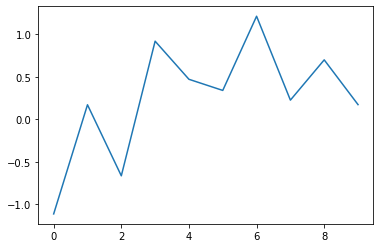

In [2]:
plt.plot(np.random.randn(10))
plt.show()

In [2]:
import ray
from ray import tune
from ray.rllib.examples.env.multi_agent import MultiAgentCartPole
from ray.rllib.examples.models.shared_weights_model import \
    SharedWeightsModel1, SharedWeightsModel2, TF2SharedWeightsModel, \
    TorchSharedWeightsModel
from ray.rllib.models import ModelCatalog
# from ray.rllib.policy import PolicySpec
from ray.rllib.utils.framework import try_import_tf
from ray.rllib.utils.test_utils import check_learning_achieved
from ray.tune.registry import register_env

In [3]:
import ray
from ray.rllib.agents.ppo import PPOTrainer
from ray.rllib.agents.ppo import DEFAULT_CONFIG as DEFAULT_CONFIG_PPO

from ray.rllib.agents.dqn import DQNTrainer, DEFAULT_CONFIG 
from ray.rllib.agents.dqn import  DEFAULT_CONFIG as DEFAULT_CONFIG_DQN


from ray.tune.registry import register_env
from ray.tune.logger import pretty_print

ray.init(ignore_reinit_error=True, log_to_driver=False)

2021-10-11 13:37:59,143	INFO services.py:1245 -- View the Ray dashboard at http://127.0.0.1:8265


{'node_ip_address': '192.168.1.242',
 'raylet_ip_address': '192.168.1.242',
 'redis_address': '192.168.1.242:6379',
 'object_store_address': '/tmp/ray/session_2021-10-11_13-37-56_986181_97559/sockets/plasma_store',
 'raylet_socket_name': '/tmp/ray/session_2021-10-11_13-37-56_986181_97559/sockets/raylet',
 'webui_url': '127.0.0.1:8265',
 'session_dir': '/tmp/ray/session_2021-10-11_13-37-56_986181_97559',
 'metrics_export_port': 51473,
 'node_id': '5c6aa6de8998b507829b04668e5f7a62cac8427d394e2718b4ecccf8'}

In [4]:
register_env('MG_t4td_env', lambda c: MatrixGameEnv_no_history(
    player2=TitForTatThenDefectPlayer(min_defect_turn=0, max_defect_turn=100)))

register_env('MG_t4t_env', lambda c: MatrixGameEnv_no_history(
    player2=TitForTatPlayer()))


In [6]:
base_dir = '/home/peter/Documents/ML/rl_ipd/single_agent_runs1/new_runs/'
exp_dir = 'PPO_lstm_single_t4t/'
# exp_dir = 'PPO_lstm_single_t4td/'

cp_path = "/checkpoint_000100/checkpoint-100"
exps = os.listdir(base_dir+exp_dir)
test_exp = exps[0]

In [5]:
base_dir = '/home/peter/Documents/ML/rl_ipd/more_runs/MA_lstm/'
exp_dir = 'MA_PPO2/'
# exp_dir = 'PPO_lstm_single_t4td/'

cp_path = "/checkpoint_000100/checkpoint-100"
exps = os.listdir(base_dir+exp_dir)
test_exp = exps[0]

In [6]:

t4t_frac = []
coop_frac = []
for test_exp in exps:
    path1 = base_dir+ exp_dir+test_exp
# path1 = base_dir+ exp_dir+run_dir

# path1='/home/peter/Documents/ML/rl_ipd/single_agent_runs1/new_runs/DQN_single_t4t'
# path1='/home/peter/Documents/ML/rl_ipd/single_agent_runs1/new_runs/DQN_single_t4t/DQN_MG_t4t_env_3dc73_00000_0_gamma=0.999,lr=0.001,n_step=1_2021-08-13_15-33-36'
    
    if os.path.exists(path1 + cp_path):
        with open(path1 + '/params.pkl', 'rb') as f:
            data = pickle.load(f)
        agent = PPOTrainer(config=data)
        agent.restore(path1+ cp_path, )
        t_frac, c_frac = evaluation.is_t4t_no_history(agent,100)
        t4t_frac.append(t_frac[0])
        coop_frac.append(c_frac)

TypeError: an integer is required (got type bytes)

2021-10-11 13:49:06,864	WARNING worker.py:1189 -- The autoscaler failed with the following error:
Traceback (most recent call last):
  File "/home/peter/anaconda3/lib/python3.8/site-packages/ray/autoscaler/_private/monitor.py", line 317, in run
    self._run()
  File "/home/peter/anaconda3/lib/python3.8/site-packages/ray/autoscaler/_private/monitor.py", line 207, in _run
    self.update_load_metrics()
  File "/home/peter/anaconda3/lib/python3.8/site-packages/ray/autoscaler/_private/monitor.py", line 169, in update_load_metrics
    response = self.gcs_node_resources_stub.GetAllResourceUsage(
  File "/home/peter/.local/lib/python3.8/site-packages/grpc/_channel.py", line 826, in __call__
    return _end_unary_response_blocking(state, call, False, None)
  File "/home/peter/.local/lib/python3.8/site-packages/grpc/_channel.py", line 729, in _end_unary_response_blocking
    raise _InactiveRpcError(state)
grpc._channel._InactiveRpcError: <_InactiveRpcError of RPC that terminated with:
	status 

In [12]:
env = MatrixGameEnv_no_history(player2=TitForTatPlayer())

In [19]:
env.observation_space.sample()

array([0.62363774, 0.6606885 , 0.8033436 , 0.898997  ], dtype=float32)

In [26]:
agent.get_policy().model.get_initial_state()

[tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [27]:
obs = env.observation_space.sample()
state = agent.get_policy().model.get_initial_state()
agent.compute_action(obs, prev_action=0, prev_reward=0, state=state)

(0,
 [array([ 0.7615942,  0.7615942, -0.7615942, -0.7615942, -0.7615942,
         -0.7615942, -0.7615942, -0.7615942,  0.7615942,  0.7615942,
         -0.7615942, -0.7615942, -0.7615942,  0.7615942, -0.7615942,
         -0.7615942, -0.7615942, -0.7615942, -0.7615942, -0.7615942,
          0.7615942,  0.7615942,  0.7615942, -0.7615942, -0.7615942,
         -0.7615942,  0.7615942,  0.7615942,  0.7615942,  0.7615942,
          0.7615942, -0.7615942,  0.7615942,  0.7615942, -0.7615942,
         -0.7615942, -0.7615942, -0.7615942, -0.7615942,  0.7615942,
          0.7615942, -0.7615942, -0.7615942, -0.7615942, -0.7615942,
         -0.7615942,  0.7615942,  0.7615942, -0.7615942,  0.7615942,
         -0.7615942,  0.7615942, -0.7615942, -0.7615942, -0.7615942,
         -0.7615942,  0.7615942,  0.7615942, -0.7615942,  0.7615942,
         -0.7615942,  0.7615942, -0.7615942,  0.7615942, -0.7615942,
         -0.7615942, -0.7615942, -0.7615942, -0.7615942, -0.7615942,
          0.7615942, -0.761594

2021-08-16 22:09:32,286	WARNING worker.py:1189 -- The autoscaler failed with the following error:
Traceback (most recent call last):
  File "/home/peter/anaconda3/lib/python3.8/site-packages/ray/autoscaler/_private/monitor.py", line 317, in run
    self._run()
  File "/home/peter/anaconda3/lib/python3.8/site-packages/ray/autoscaler/_private/monitor.py", line 207, in _run
    self.update_load_metrics()
  File "/home/peter/anaconda3/lib/python3.8/site-packages/ray/autoscaler/_private/monitor.py", line 169, in update_load_metrics
    response = self.gcs_node_resources_stub.GetAllResourceUsage(
  File "/home/peter/.local/lib/python3.8/site-packages/grpc/_channel.py", line 826, in __call__
    return _end_unary_response_blocking(state, call, False, None)
  File "/home/peter/.local/lib/python3.8/site-packages/grpc/_channel.py", line 729, in _end_unary_response_blocking
    raise _InactiveRpcError(state)
grpc._channel._InactiveRpcError: <_InactiveRpcError of RPC that terminated with:
	status 

In [49]:
coop_frac

[0.53,
 1.0,
 0.45999999999999996,
 0.6699999999999999,
 0.79,
 0.65,
 1.0,
 0.48,
 0.6799999999999999,
 0.43000000000000005,
 0.5800000000000001,
 0.09999999999999998,
 0.54,
 0.7]